<div style="border:2px solid #030833; border-radius:15px;  background:#ffffff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:12px; background:#030833; text-align:center;">
        <span style="font-family:sans-serif; font-size:50px; color:#fff;">Geopandas ~ Data Visualization </span>
    </div>
</div>

# <span style = "background:#030833; border:#030833; font-size:100%; color:#fff; border-radius:1px 1px;">For my other notebooks you can click on:  </span>


<a href="https://www.kaggle.com/code/eisgandar/gold-price-prediction-with-lstm">
    <button>Gold price prediction with LSTM</button>
</a>

<a href="https://www.kaggle.com/code/eisgandar/twitter-sentiment-analysis-hatred-speech">
    <button>Twitter sentiment analysis ~ hatred speech</button>
</a>

<a href="https://www.kaggle.com/code/eisgandar/smoking-signal-of-body-classification">
    <button>Smoking signal of body classification</button>
</a>

<a href="https://www.kaggle.com/code/eisgandar/titanic-survivor-prediction">
    <button>Titanic survival prediction</button>
</a>

<a href="https://www.kaggle.com/code/eisgandar/detect-fake-real-news-glove-emb-lstm">
    <button>Detect fake and real news with GLOVE embeddings and LSTM</button>
</a>

<a href="https://www.kaggle.com/code/eisgandar/car-prices-predict-with-ensemble-methods">
    <button>Cars prices prediction by using ensemble methods</button>
</a>

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#030833;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Introduction... 📜</span>
    </div>
</div>

<div style="border:1px solid blue; border-radius:10px; padding:2px">
    <img src="https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2005/05/envisat_mosaic_may_-_november_2004/9695811-3-eng-GB/Envisat_mosaic_May_-_November_2004_pillars.jpg" width="100%">
</div>
<div style="padding:4px">
    
<b><mark>GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting. The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.</mark></b>
</div>

<b><mark>REFERENCE: 🔗</mark></b> https://geopandas.org/en/stable/

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#030833;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Install geopandas library... 📥 </span>
    </div>
</div>

In [1]:
!pip install geopandas &> /dev/null

print("\nGEOPANDAS LIBRARY WAS SUCCESFULLY INSTALLED")


GEOPANDAS LIBRARY WAS SUCCESFULLY INSTALLED


<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#030833;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Import necessary libraries...⏳️</span>
    </div>
</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import geoplot
import rasterio
from rasterio.plot import show
import mapclassify
from shapely.geometry import Point
import libpysal as ps
import contextily as cx
from cartopy import crs as ccrs
from shapely.geometry import Polygon

from warnings import filterwarnings
filterwarnings("ignore")

from termcolor import colored
print(colored("\nTHE REQUIRED LIBRARIES WERE SUCCESULLY IMPORTED", color = "green", attrs = ["bold", "dark"]))

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string



THE REQUIRED LIBRARIES WERE SUCCESULLY IMPORTED


<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#030833;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Using GeoPandas with Rasterio to sample point data... 🖼</span>
    </div>
</div>

In [3]:
#Generating a geodataframe from a set of points

points = [Point(625466, 5621289), Point(626082, 5621627), Point(627116, 5621680), Point(625095, 5622358)]
geo_df = geopandas.GeoDataFrame([1, 2, 3, 4], geometry = points, crs = 32630)

#display geo_df
geo_df.head()

0                        geometry
0  1  POINT (625466.000 5621289.000)
1  2  POINT (626082.000 5621627.000)
2  3  POINT (627116.000 5621680.000)
3  4  POINT (625095.000 5622358.000)

In [4]:
#use rasterio to open the raster data to be sampled
src = rasterio.open('../input/slums-argentina/cordoba_capital/cordoba_capital/T20JLL_0_32_2592_2624.tif')

<AxesSubplot:>

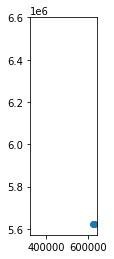

In [5]:
fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap='pink')

geo_df.plot(ax=ax)

In [6]:
#Rasterio requires a list of the coordinates in x,y format rather than as the points that are in the geomentry column.

coord_list = [(x,y) for x,y in zip(geo_df['geometry'].x , geo_df['geometry'].y)]

geo_df['value'] = [x for x in src.sample(coord_list)]
geo_df.head()

0                        geometry         value
0  1  POINT (625466.000 5621289.000)  [0, 0, 0, 0]
1  2  POINT (626082.000 5621627.000)  [0, 0, 0, 0]
2  3  POINT (627116.000 5621680.000)  [0, 0, 0, 0]
3  4  POINT (625095.000 5622358.000)  [0, 0, 0, 0]

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#030833;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Plotting with CartoPy and GeoPandas... 🎨</span>
    </div>
</div>

<b><mark>CartoPy is a Python library that specializes in creating geospatial visualizations. It has a slightly different way of representing Coordinate Reference Systems (CRS) as well as constructing plots. This example steps through a round-trip transfer of data between GeoPandas and CartoPy. Cartopy also handles Shapely objects well, but it uses a different system for CRS. To plot this data with CartoPy, we’ll first need to project it into a new CRS. We’ll use a CRS defined within CartoPy and use the GeoPandas to_crs method to make the transformation.</mark></b>

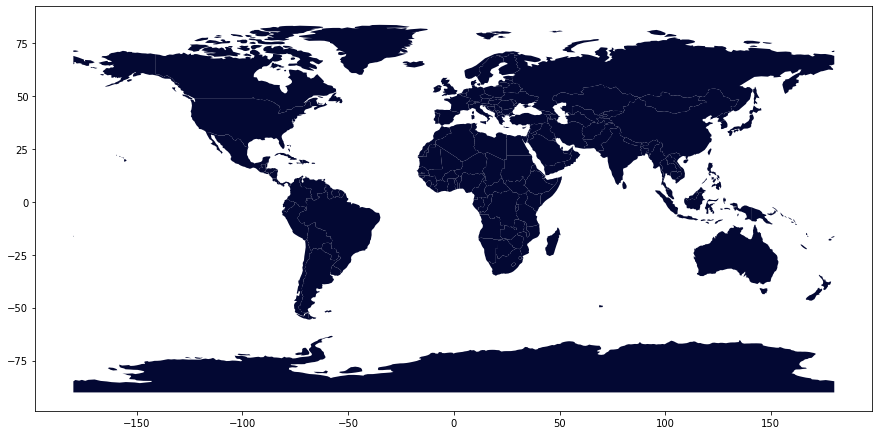

In [7]:
path = geopandas.datasets.get_path("naturalearth_lowres")
data = geopandas.read_file(path)

# We will use this column later
data["gdp_pp"] = data["gdp_md_est"] / data["pop_est"]

plt.rcParams["figure.figsize"] = (15, 10)
data.plot(color = "#030833");

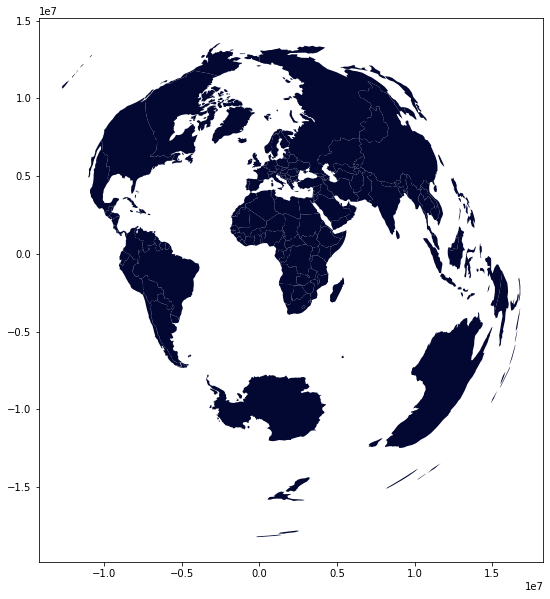

In [8]:
# define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# convert into a "proj4" string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_azeq = data.to_crs(crs_proj4)

plt.rcParams["figure.figsize"] = (10, 10)
df_azeq.plot(color = "#030833");

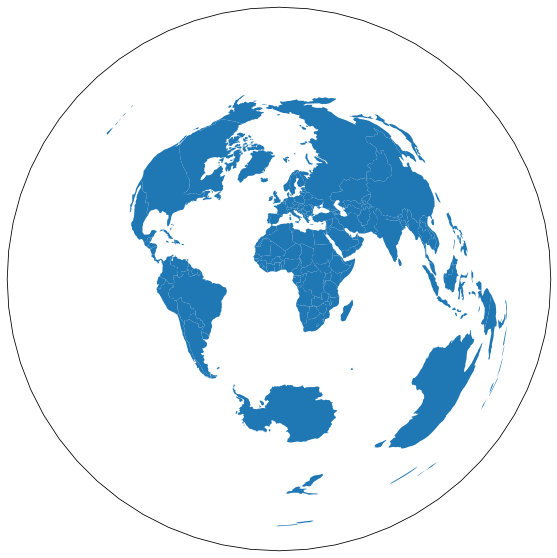

In [9]:
plt.rcParams["figure.figsize"] = (10, 10)

fig, ax = plt.subplots(subplot_kw = {"projection": crs})
ax.add_geometries(df_azeq["geometry"], crs = crs);

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#030833;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Clip Vector Data with GeoPandas...✂️</span>
    </div>
</div>

<b><mark>The example below shows you how to clip a set of vector geometries to the spatial extent / shape of another vector object. Both sets of geometries must be opened with GeoPandas as GeoDataFrames and be in the same Coordinate Reference System (CRS) for the clip function in GeoPandas to work. This example uses GeoPandas example data 'naturalearth_cities' and 'naturalearth_lowres', alongside a custom rectangle geometry made with shapely and then turned into a GeoDataFrame.</mark></b>


<b><mark>Below, the example GeoPandas data is imported and opened as a GeoDataFrame. Additionally, a polygon is created with shapely and then converted into a GeoDataFrame with the same CRS as the GeoPandas world dataset.</mark></b>

In [10]:
capitals = geopandas.read_file(geopandas.datasets.get_path("naturalearth_cities"))
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

# create a subset of the world data that is just the North American continent
north_america = world[world["continent"] == "North America"]

# create a custom polygon
polygon = Polygon([(0, 0), (0, 90), (180, 90), (180, 0), (0, 0)])
poly_gdf = geopandas.GeoDataFrame([1], geometry = [polygon], crs = world.crs)

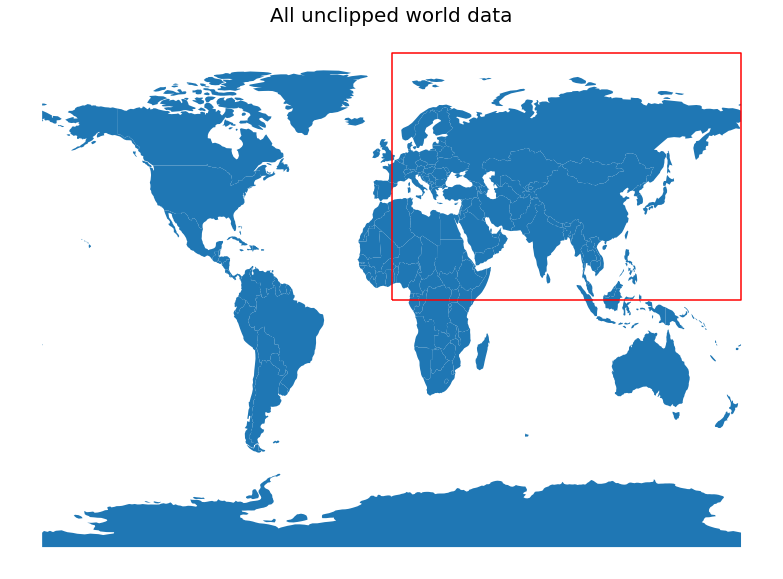

In [11]:
# plot the unclipped data

fig, ax = plt.subplots(1, 1, figsize = (20, 10))
world.plot(ax = ax)
poly_gdf.boundary.plot(ax = ax, color = "red")
ax.set_title("All unclipped world data", fontsize = 20)
ax.set_axis_off()
ax.set_axis_off()
plt.show()

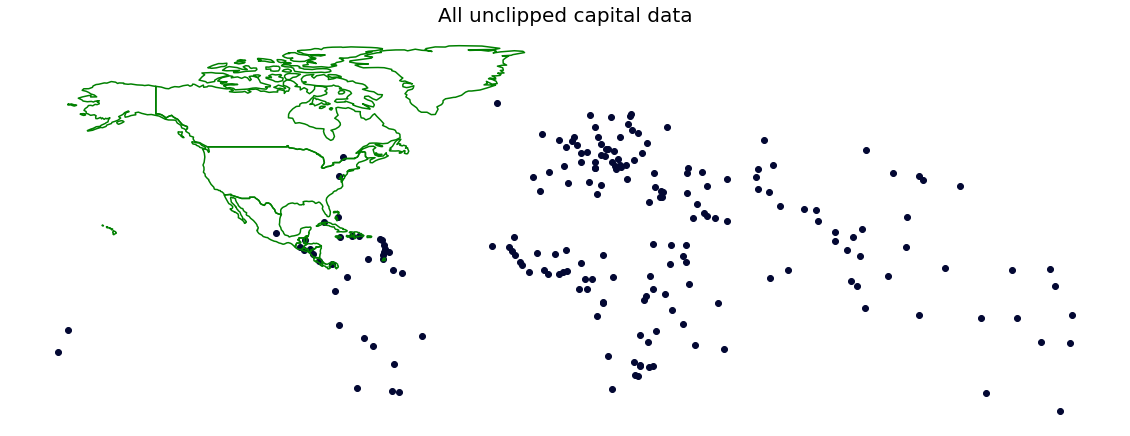

In [12]:
# plot the unclipped data

fig, ax = plt.subplots(1, 1, figsize = (20, 10))

north_america.boundary.plot(ax = ax, color = "green")
capitals.plot(ax = ax, color = "#030833")
ax.set_title("All unclipped capital data", fontsize = 20)
ax.set_axis_off()
ax.set_axis_off()
plt.show()

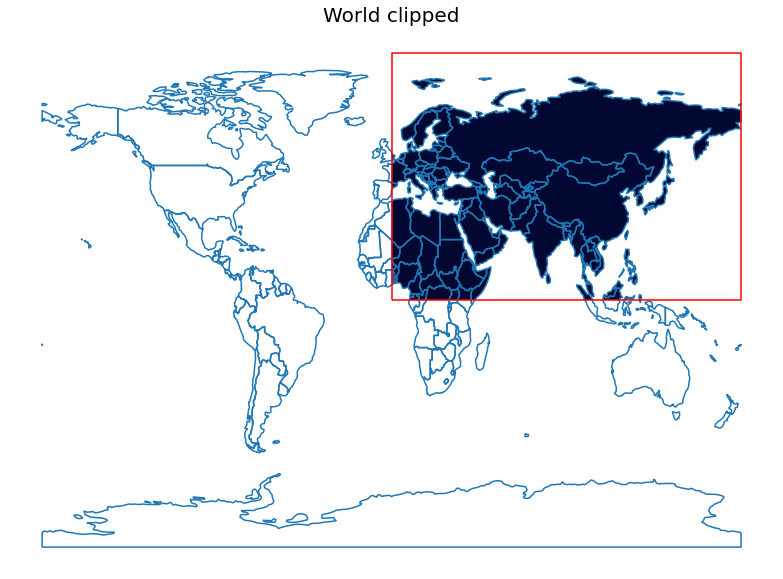

In [13]:
# clip the world data
# plot the clipped data
# The plot below shows the results of the clip function applied to the world

world_clipped = world.clip(polygon)

fig, ax = plt.subplots(figsize = (20, 10))
world_clipped.plot(ax = ax, color = "#030833")
world.boundary.plot(ax = ax)
poly_gdf.boundary.plot(ax = ax, color = "red")
ax.set_title("World clipped", fontsize = 20)
ax.set_axis_off()
plt.show()

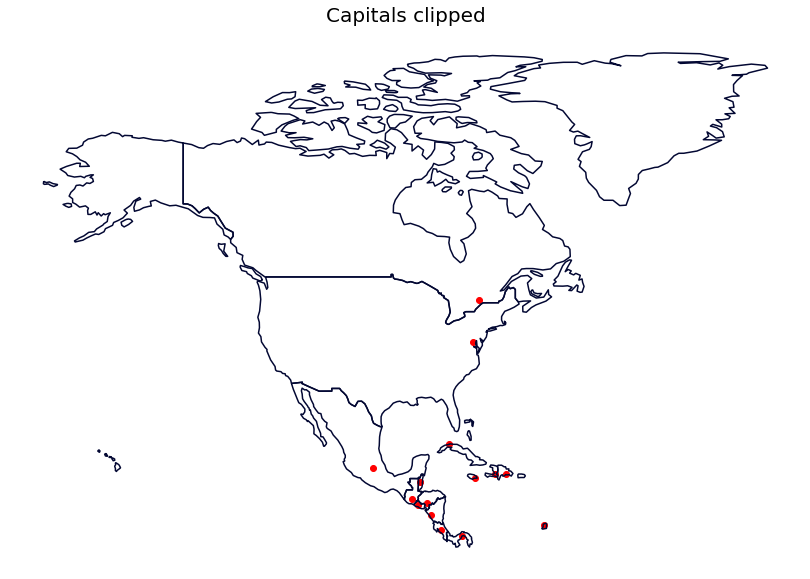

In [14]:
# clip the capitals data
# plot the clipped data
# the plot below shows the results of the clip function applied to the capital cities

capitals_clipped = capitals.clip(north_america)

fig, ax = plt.subplots(figsize = (20, 10))
capitals_clipped.plot(ax = ax, color = "red")
north_america.boundary.plot(ax = ax, color = "#030833")
ax.set_title("Capitals clipped", fontsize = 20)
ax.set_axis_off()
plt.show()

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#030833;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Plotting with Geoplot and GeoPandas... 📊</span>
    </div>
</div>

<b><mark>Geoplot is a Python library providing a selection of easy-to-use geospatial visualizations. It is built on top of the lower-level CartoPy, covered in a separate section of this tutorial, and is designed to work with GeoPandas input. This example is a brief tour of the geoplot API.</mark></b>

### Plotting with Geoplot


In [15]:
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
boroughs = geopandas.read_file(geoplot.datasets.get_path("nyc_boroughs"))
collisions = geopandas.read_file(geoplot.datasets.get_path("nyc_injurious_collisions"))

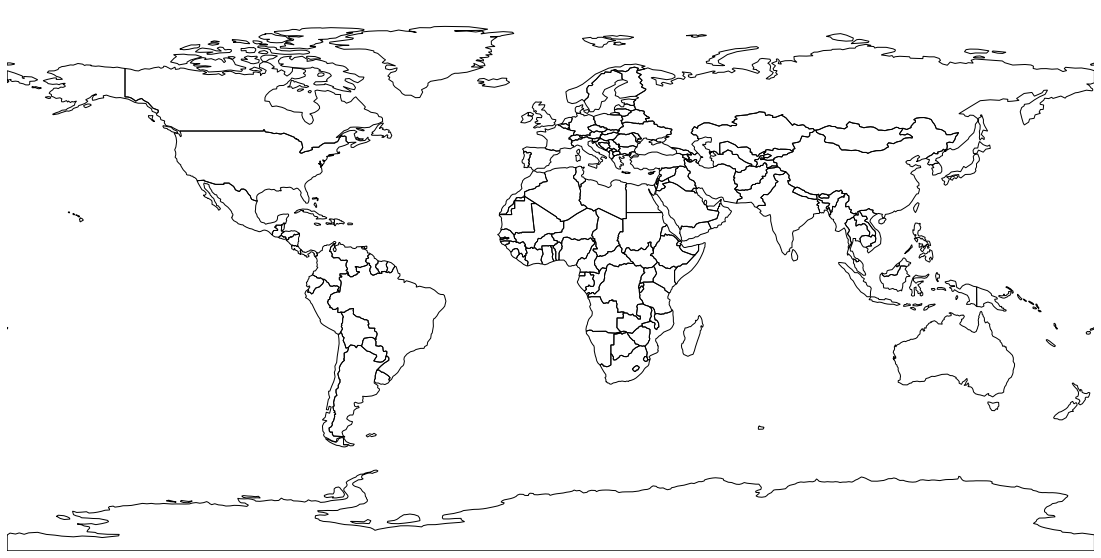

In [16]:
geoplot.polyplot(world, figsize = (20, 10));

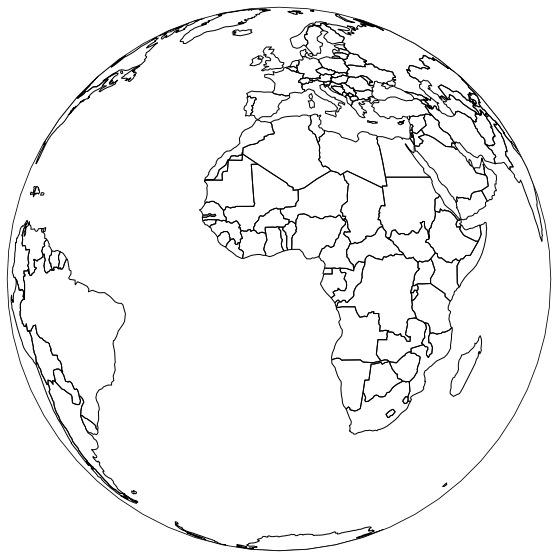

In [17]:
# use the orthographic map projection
ax = geoplot.polyplot(world, projection = geoplot.crs.Orthographic(), figsize = (20, 10))
ax.outline_patch.set_visible(b = True)

<b><mark>If we want to use color as a visual variable, specify a choropleth. Here we sort GDP per person by country into five buckets by color, using “quantiles” binning from the Mapclassify library.</mark></b>

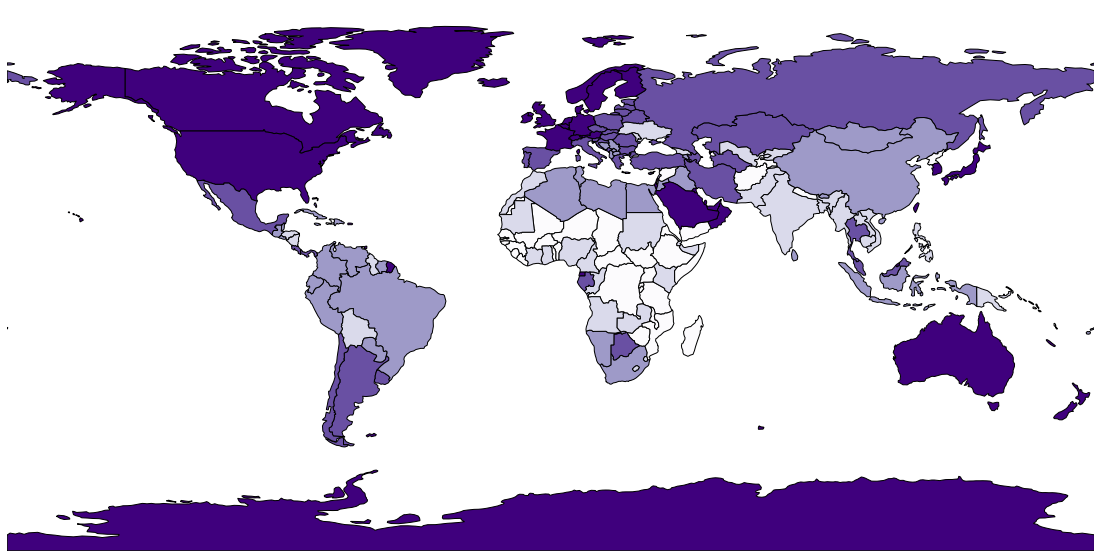

In [18]:
gpd_per_person = world["gdp_md_est"] / world["pop_est"]
scheme = mapclassify.Quantiles(gpd_per_person, k = 5)

geoplot.choropleth(world, hue = gpd_per_person, scheme = scheme, cmap = "Purples", figsize = (20, 10));

<b><mark>If we want to use size as a visual variable, we can use a cartogram. Here are population estimates for countries in Europe.</mark></b>

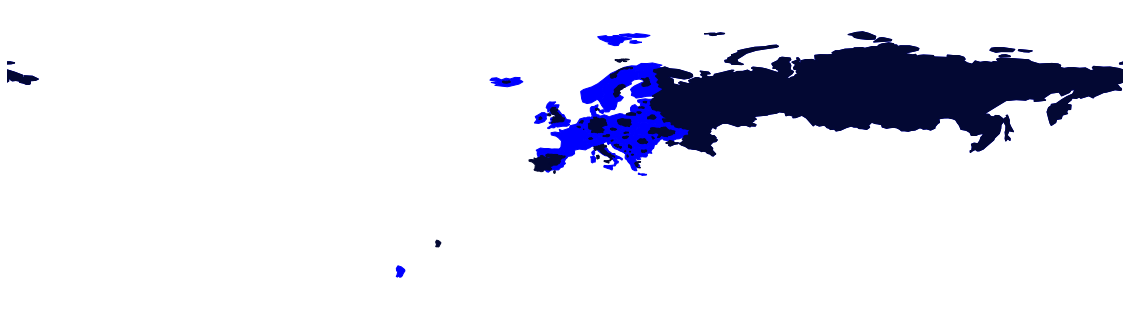

In [19]:
europe = world.query("continent == 'Europe'")
ax = geoplot.cartogram(europe, scale = "pop_est", limits = (0.25, 1), edgecolor = "None", color = "#030833", figsize = (20, 10))
geoplot.polyplot(europe, edgecolor = "gray", ax = ax, color = "blue");

<b><mark>If we have data in the shape of points in space, we may generate a three-dimensional heatmap on it using kdeplot.</mark></b>

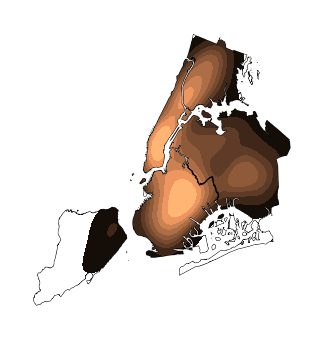

In [20]:
ax = geoplot.kdeplot(collisions.head(2000), clip = boroughs.geometry, shade = True, cmap = "copper",
                     projection = geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax = ax, zorder = 1, figsize = (20, 10));

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#030833;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Adding a background map to plots... 🎨</span>
    </div>
</div>

<b><mark>We use the NYC borough boundary data that is available in geopandas datasets.</mark></b>

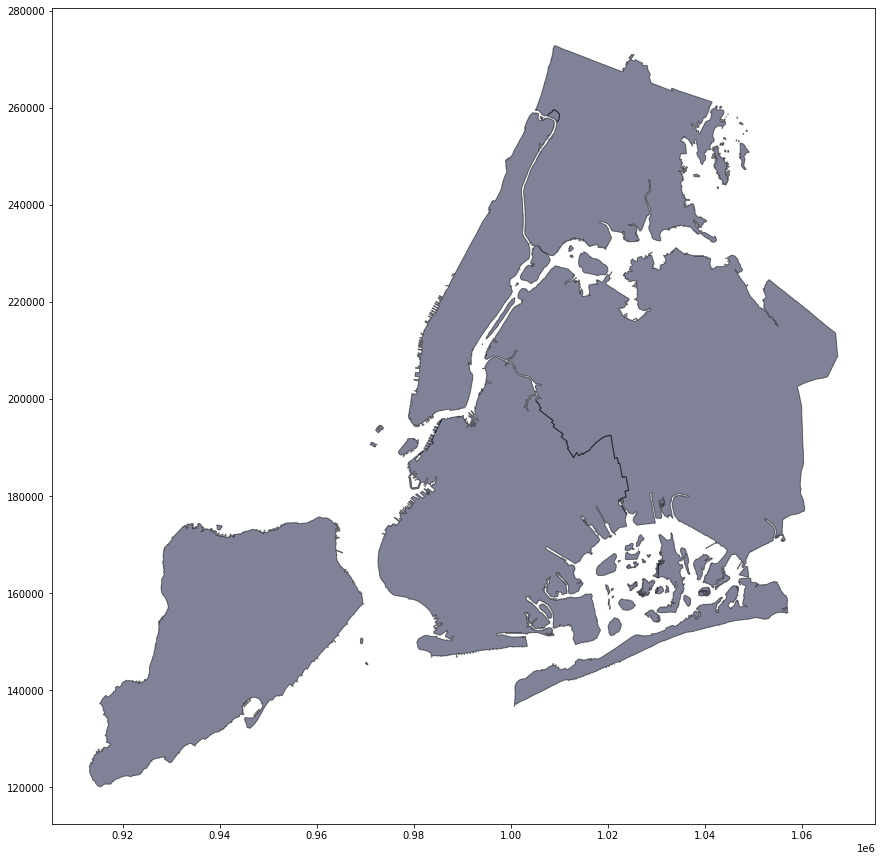

In [21]:
df = geopandas.read_file(geopandas.datasets.get_path("nybb"))
ax = df.plot(figsize = (15, 15), alpha = 0.5, edgecolor = "k", color = "#030833")

## Matching coordinate systems

<b><mark>Before adding web map tiles to this plot, we first need to ensure the coordinate reference systems (CRS) of the tiles and the data match. Web map tiles are typically provided in Web Mercator (EPSG 3857), so let us first check what CRS our NYC boroughs are in:
</mark></b>

In [22]:
df.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<b><mark>Now we know the CRS do not match, so we need to choose in which CRS we wish to visualize the data: either the CRS of the tiles, the one of the data, or even a different one. The first option to match CRS is to leverage the to_crs method of GeoDataFrames to convert the CRS of our data, here to Web Mercator:</mark></b>

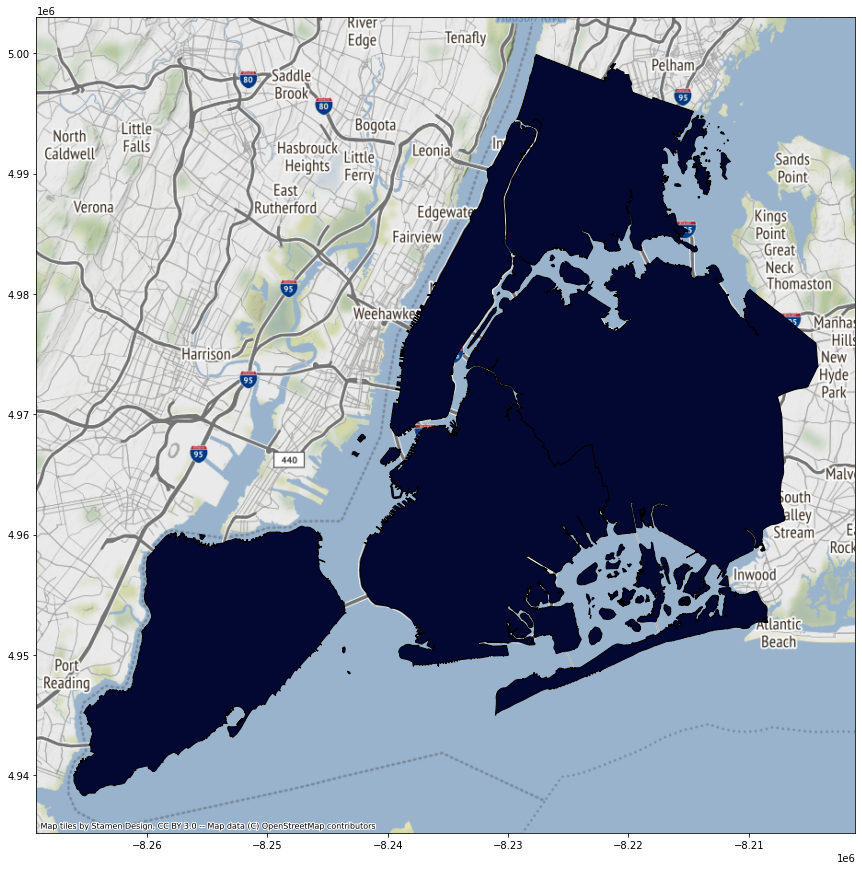

In [23]:
df_wm = df.to_crs(epsg = 3857)

ax = df_wm.plot(figsize = (15, 15), alpha = 1, edgecolor = "k", color = "#030833")
cx.add_basemap(ax)

<b><mark>If we want to convert the CRS of the tiles instead, which might be advisable for large datasets, we can use the crs keyword argument of add_basemap</mark></b>

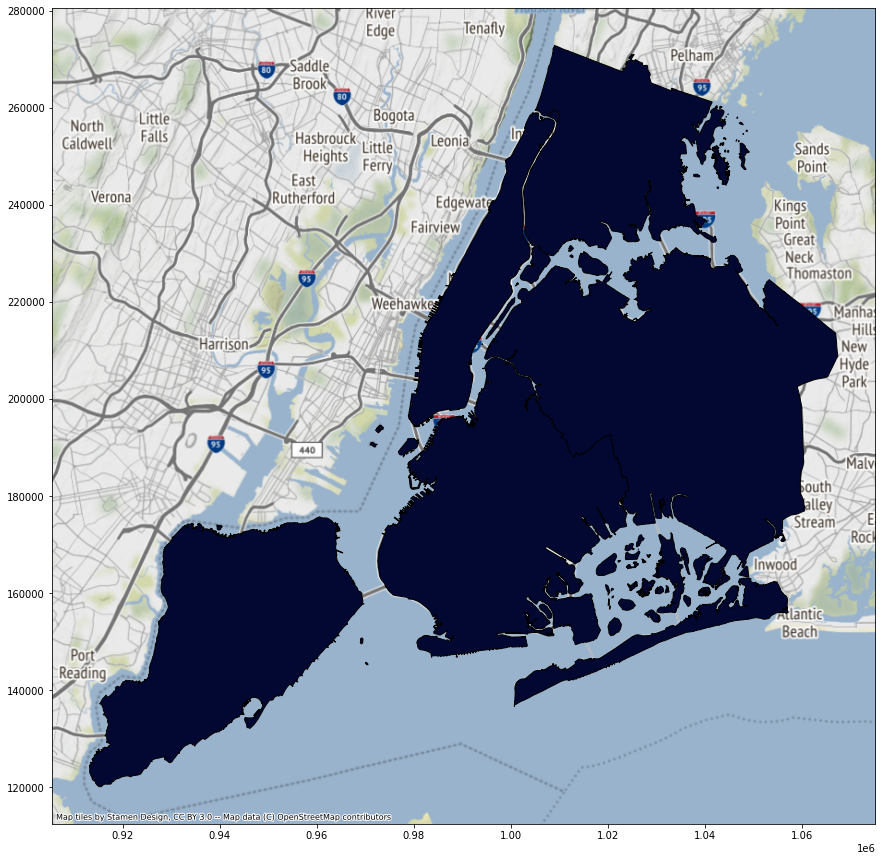

In [24]:
ax = df.plot(figsize = (15, 15), alpha = 1, edgecolor = "k", color = "#030833")
cx.add_basemap(ax, crs = df.crs)

<b><mark>We can control the detail of the map tiles using the optional "zoom" keyword</mark></b>

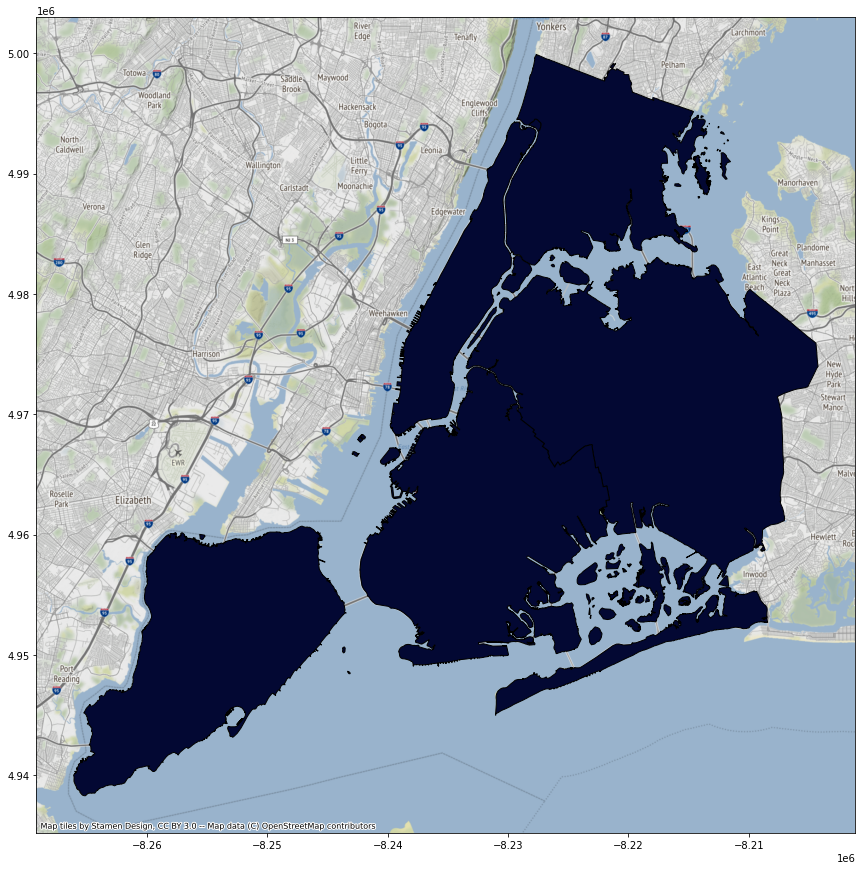

In [25]:
ax = df_wm.plot(figsize = (15, 15), alpha = 1, edgecolor = "k", color = "#030833")
cx.add_basemap(ax, zoom = 12)

## <b><mark>Choose different styles</mark></b>

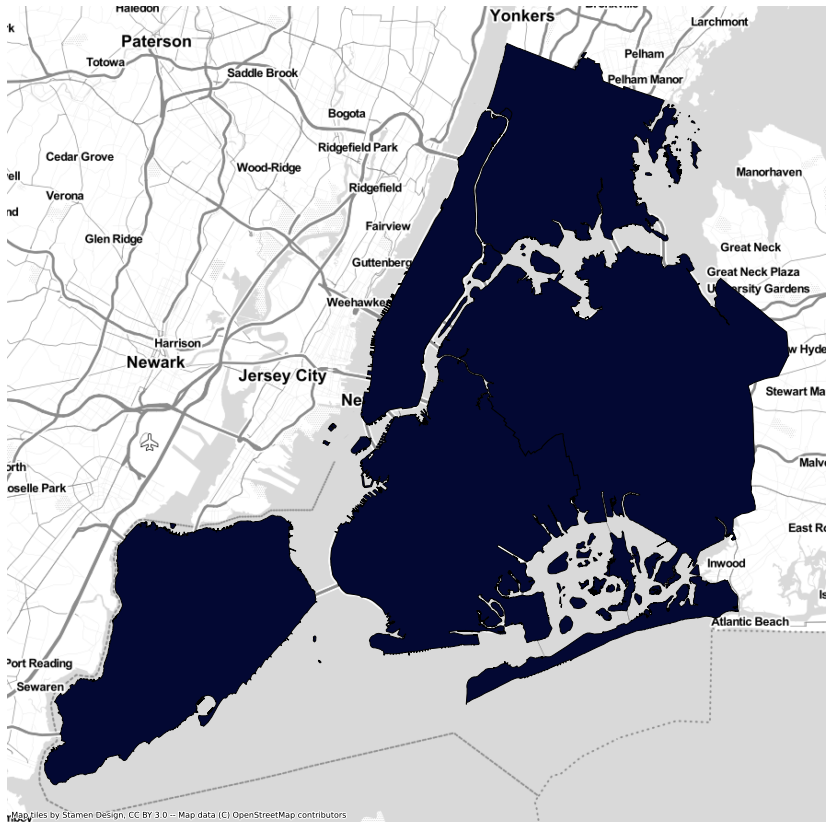

In [26]:
ax = df_wm.plot(figsize = (15, 15), alpha = 1, edgecolor = "k", color = "#030833")
cx.add_basemap(ax, source = cx.providers.Stamen.TonerLite)
ax.set_axis_off()

<b><mark>By splitting the layers like this, you can also independently manipulate the level of zoom on each layer, for example to make labels larger while still showing a lot of detail.</mark></b>

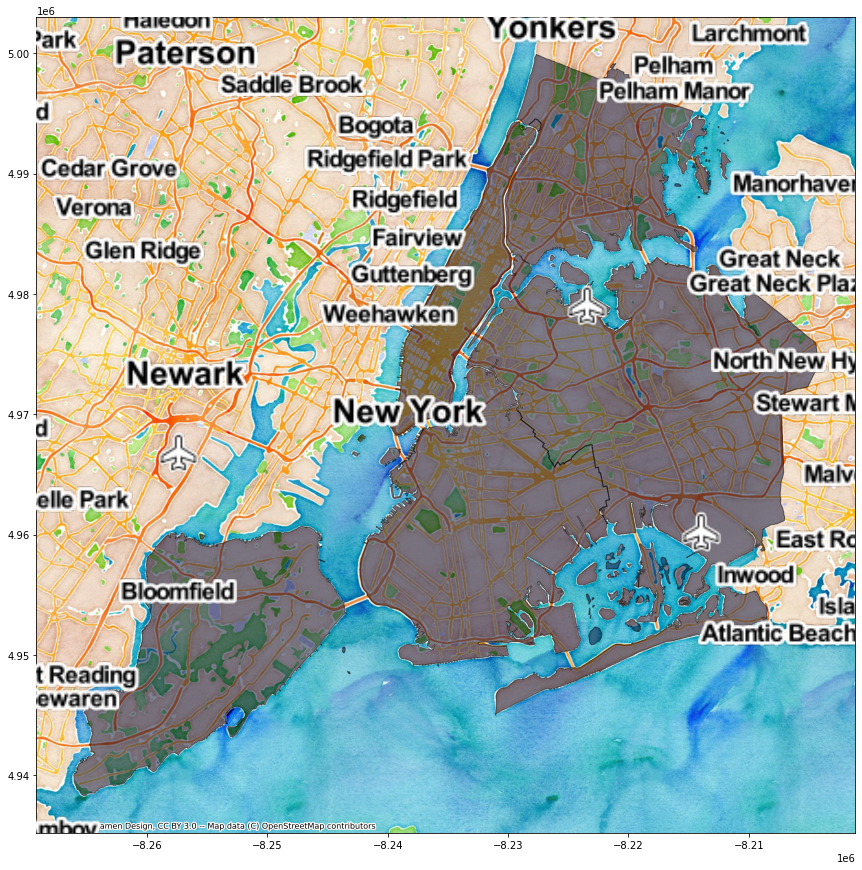

In [27]:
ax = df_wm.plot(figsize = (15, 15), alpha = 0.5, edgecolor = "k", color = "#030833")
cx.add_basemap(ax, source = cx.providers.Stamen.Watercolor, zoom = 12)
cx.add_basemap(ax, source = cx.providers.Stamen.TonerLabels, zoom = 10)

## Acknowledgement: https://geopandas.org/en/stable/index.html

# <h1 style="font-family: Sans-Serif; padding: 19px; font-size: 30px; color: #491D8B; text-align: center; line-height: 1.9;"><b>Was <mark><b>this notebook</b></mark> helpful to you? What are <mark><b>your thoughts about my work?</b></mark> We can discuss them <mark><b>in the comments section.</b></mark> Don't forget <mark><b>to support</b></mark> me.  <mark><b>Thank you</b></mark> very much for your <mark><b>attention !</b></mark> 😊  </b><br><span style = "color: #CD2DE0; font-size:25px"></span></h1>
<hr>

![](https://t3.ftcdn.net/jpg/00/14/99/22/360_F_14992211_dSNmtL3qFcNMPx6xe1c7zUODftLus9OM.jpg)